<a href="https://colab.research.google.com/github/riccardoscut/riccardoscut/blob/main/CrypToData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Creating a simple project to retrieve, clean, manipulate, and analyze cryptocurrency data using Python and pandas can be a fun way to get hands-on experience with data manipulation and analysis. Here's a step-by-step guide on how to approach this project.


1. Set Up Your Environment
Ensure you have the necessary packages installed. You'll need the following:

2. Data Retrieval
You can retrieve cryptocurrency data using public APIs like the CoinGecko API or the CoinMarketCap API. CoinGecko doesn’t require authentication, so it’s a simpler starting point.


In [87]:

pip install pandas requests matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Importiamo i moduli

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   # data visualization
pd.options.mode.chained_assignment = None  # suppress DataFrame slice warning

Read bitcoin price csv


In [89]:
df = pd.read_csv('dataset.csv')
df

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.000000e+00,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.000000e+00,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.000000e+00,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.000000e+00,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.000000e+00,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07
...,...,...,...,...,...,...,...,...,...,...
72941,72941,0.022604,0.022988,0.022197,0.022796,4.040134e+07,1.652957e+09,2022-10-23T23:59:59.999Z,VeChain,2022-10-23
72942,72942,1.468244,1.530464,1.435415,1.517878,2.844351e+07,1.572825e+09,2022-10-23T23:59:59.999Z,Flow,2022-10-23
72943,72943,4.950431,5.148565,4.945280,5.117206,1.069497e+08,1.559551e+09,2022-10-23T23:59:59.999Z,Filecoin,2022-10-23
72944,72944,0.000233,0.000243,0.000226,0.000239,2.143268e+08,1.576291e+09,2022-10-23T23:59:59.999Z,Terra Classic,2022-10-23


Bitcoin

In [90]:
btc = df.loc[df['crypto_name'] == 'Bitcoin'].copy()
btc = btc.set_index('date')
btc.index = pd.to_datetime(btc.index)
btc

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name
date,,,,,,,,,
2013-05-05,0,112.900002,118.800003,107.142998,115.910004,0.000000e+00,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin
2013-05-06,2,115.980003,124.663002,106.639999,112.300003,0.000000e+00,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin
2013-05-07,4,112.250000,113.444000,97.699997,111.500000,0.000000e+00,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin
2013-05-08,7,109.599998,115.779999,109.599998,113.566002,0.000000e+00,1.264049e+09,2013-05-08T23:59:59.999Z,Bitcoin
2013-05-09,9,113.199997,113.459999,109.260002,112.669998,0.000000e+00,1.254535e+09,2013-05-09T23:59:59.999Z,Bitcoin
...,...,...,...,...,...,...,...,...,...
2022-09-25,72692,18936.311515,19134.733194,18696.468304,18802.097976,2.335997e+10,3.602593e+11,2022-09-25T23:59:59.999Z,Bitcoin
2022-10-02,72752,19311.848708,19370.309281,18970.620583,19044.107272,2.076596e+10,3.650248e+11,2022-10-02T23:59:59.999Z,Bitcoin
2022-10-09,72815,19417.479411,19542.538654,19349.258953,19446.426194,1.683726e+10,3.728768e+11,2022-10-09T23:59:59.999Z,Bitcoin


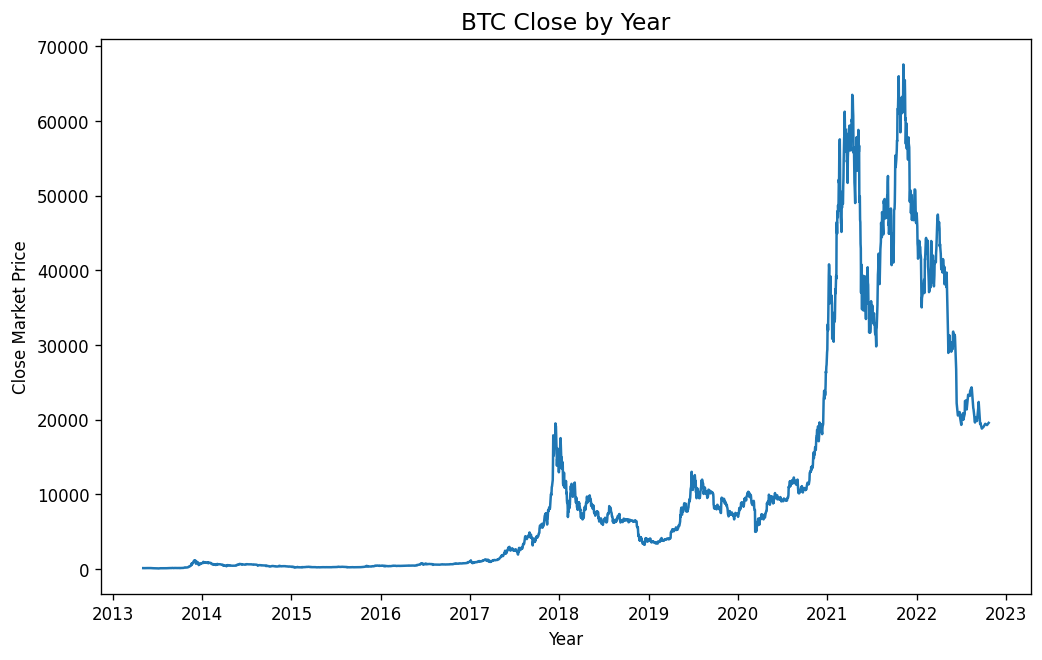

In [91]:
# Plot btc 'close' column
plt.figure(figsize=(10,6))
plt.title('BTC Close by Year', fontsize=14)
plt.ylabel('Close Market Price')
plt.xlabel('Year')
plt.plot(btc['close'])

Analyze Volatility

In [92]:
annual_volatility = btc['close'].groupby(btc.index.year).std()
annual_volatility

date
2013     277.250404
2014     148.637744
2015      59.337860
2016     139.255734
2017    4053.192202
2018    2455.455469
2019    2641.803823
2020    4228.934474
2021    9877.460240
2022    9249.822449
Name: close, dtype: float64

Lets' standardize the volatility considering the the period.

In [93]:
close_annual_vol = btc['close'].index.map(lambda d: annual_volatility.loc[d.year])
close_annual_vol

Index([277.25040402278984, 277.25040402278984, 277.25040402278984,
       277.25040402278984, 277.25040402278984, 277.25040402278984,
       277.25040402278984, 277.25040402278984, 277.25040402278984,
       277.25040402278984,
       ...
        9249.822448508365,  9249.822448508365,  9249.822448508365,
        9249.822448508365,  9249.822448508365,  9249.822448508365,
        9249.822448508365,  9249.822448508365,  9249.822448508365,
        9249.822448508365],
      dtype='float64', name='date', length=3248)

In [94]:
btc['vol_year'] = btc['close'] / close_annual_vol
btc['vol_year']

date
2013-05-05    0.418070
2013-05-06    0.405049
2013-05-07    0.402164
2013-05-08    0.409615
2013-05-09    0.406384
                ...   
2022-09-25    2.032698
2022-10-02    2.058862
2022-10-09    2.102357
2022-10-16    2.083077
2022-10-23    2.115393
Name: vol_year, Length: 3248, dtype: float64

Text(0.5, 1.0, 'BTC Votality Standardized')

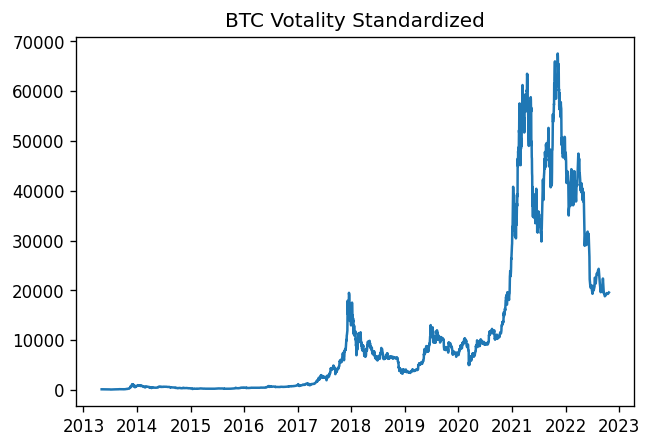

In [95]:
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})
plt.plot(btc['close'])
plt.title('BTC Votality Standardized', fontsize=12)

Text(0, 0.5, 'close')

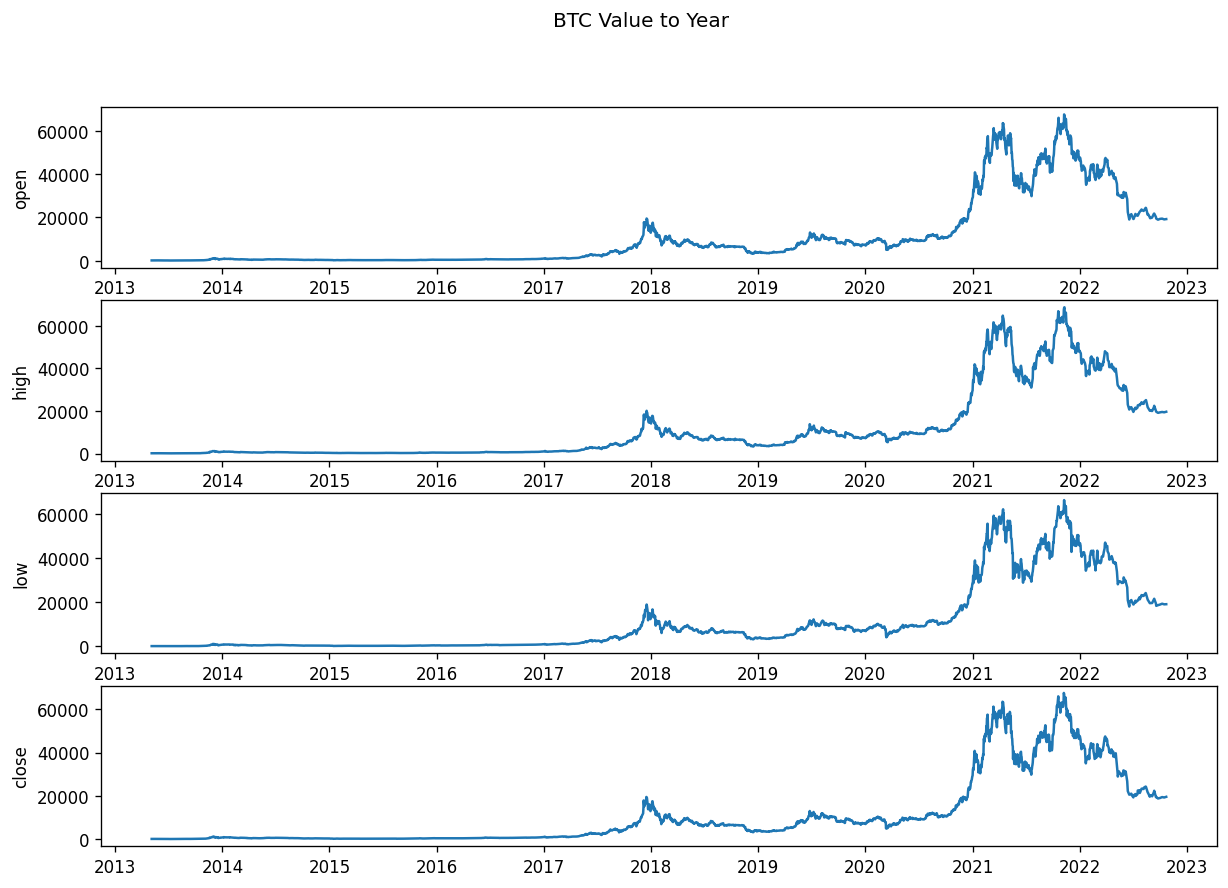

In [96]:
# Plot
plt.rcParams.update({'figure.figsize': (12,8)})
fig, axs = plt.subplots(4)
fig.suptitle('BTC Value to Year')
axs[0].plot(btc['open'])
axs[0].set_ylabel('open')
axs[1].plot(btc['high'])
axs[1].set_ylabel('high')
axs[2].plot(btc['low'])
axs[2].set_ylabel('low')
axs[3].plot(btc['close'])
axs[3].set_ylabel('close')

Calculate 3 days moving average

In [97]:
btc['3_day_MA'] = btc['close'].rolling(window=3).mean()
print(btc['3_day_MA'])

date
2013-05-05             NaN
2013-05-06             NaN
2013-05-07      113.236669
2013-05-08      112.455335
2013-05-09      112.578667
                  ...     
2022-09-25    19255.244472
2022-10-02    19130.111499
2022-10-09    19097.543814
2022-10-16    19252.875422
2022-10-23    19427.175464
Name: 3_day_MA, Length: 3248, dtype: float64


Find higest price

In [98]:
highest_price = btc['high'].max()
print(highest_price)

lowest_price = btc['low'].min()
print(lowest_price)

68789.6259389221
65.5260009766


6. Basic Analysis and Visualization
You can perform some basic analysis and visualize the data to understand trends. For example, plot the price and moving average over time.

In [99]:
import matplotlib.pyplot as plt

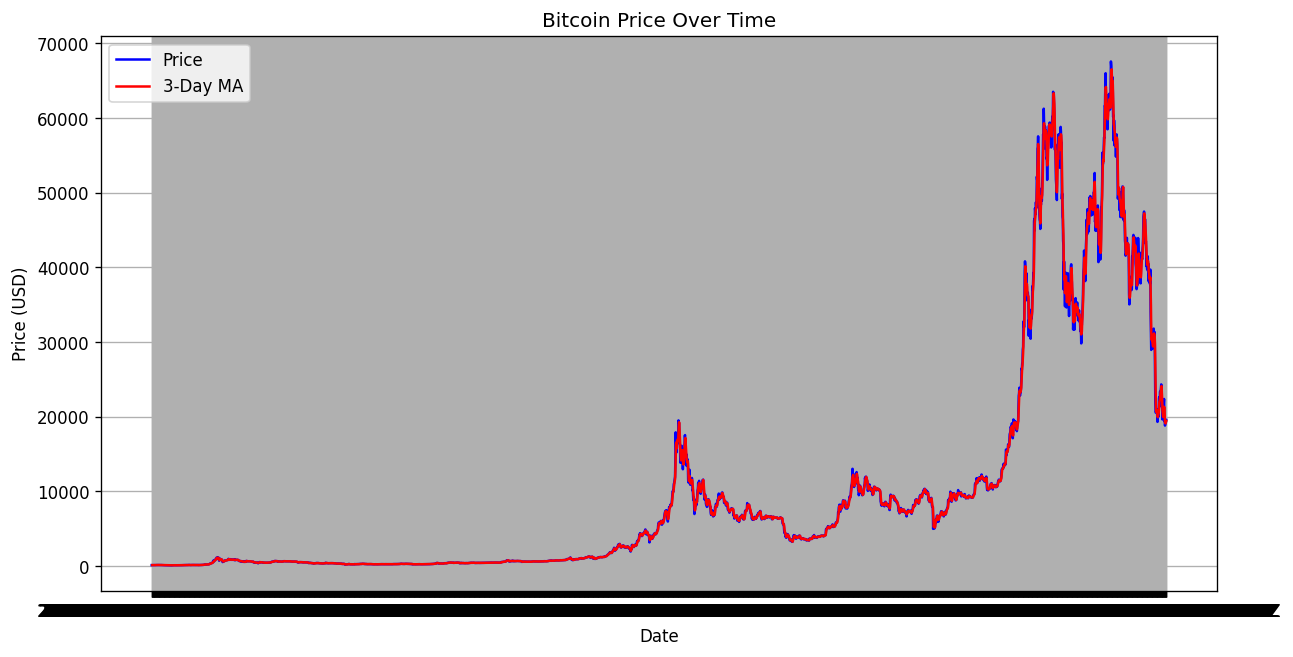

In [100]:
plt.figure(figsize=(12, 6))
plt.plot(btc['timestamp'], btc['close'], label='Price', color='blue')
plt.plot(btc['timestamp'], btc['3_day_MA'], label='3-Day MA', color='red')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

Saving your data

In [101]:
btc.to_csv('btc_after_changes.csv', index=False)

Carica i dati:
Importa il dataset di prezzo di Cardano che hai ottenuto tramite l’API di CoinGecko.
Scarica e carica anche il dataset di notizie dal link che hai fornito. Questo dataset include articoli e notizie legate alle criptovalute, con timestamp che indicano quando è stata pubblicata ogni notizia.

In [102]:
pip install vaderSentiment

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [103]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Carica il dataset ddelle notizie di Bitcoin


In [104]:
news_data = pd.read_csv('cryptopanic_news.csv')
news_data


,id,title,sourceId,date,url,negative,positive,important,liked,disliked,lol,toxic,saved,comments
0,873,ApeCoin Community Votes to Stay on Ethereum,2,6/9/2022 6:57,https://cryptopanic.com/news/15444990/ApeCoin-...,0,0,0,0,0,0,0,0,0
1,875,Terraform Labs Co-Founder Denies Accusations o...,2,6/9/2022 6:03,https://cryptopanic.com/news/15443520/Terrafor...,0,0,0,1,0,0,0,0,0
2,876,Anchor dev claims he warned Do Kwon over unsus...,7,6/9/2022 5:39,https://cryptopanic.com/news/15442676/Anchor-d...,1,0,1,0,0,0,0,0,0
3,877,"With 12 Key Measures of Prices, Truflation’s R...",11,6/9/2022 5:32,https://cryptopanic.com/news/15442724/With-12-...,0,0,0,0,0,0,0,0,0
4,878,'Father' of the Metaverse Neal Stephenson laun...,7,6/9/2022 5:28,https://cryptopanic.com/news/15442350/Father-o...,0,1,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164996,174621,"ETH-based Memecoin, MOG Hits New ATH, Enters T...",144,7/15/2024 13:15,https://cryptopanic.com/news/19688034/ETH-base...,0,0,0,0,0,0,0,0,0
164997,174622,Mog Coin Price Continues to Surge as New Wiene...,144,7/15/2024 11:24,https://cryptopanic.com/news/19687607/Mog-Coin...,0,0,0,0,0,0,0,0,0
164998,174623,Ethereum Memecoin MOG Becomes Biggest 24H Gain...,134,7/15/2024 7:02,https://cryptopanic.com/news/19687017/Ethereum...,0,0,0,0,0,0,0,0,0
164999,174624,Year-to-Date Crypto Winners: Meme Coins Outper...,24,7/13/2024 14:20,https://cryptopanic.com/news/19683727/Year-to-...,0,0,0,0,0,0,0,0,0


In [105]:
#df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce') 
news_data['timestamp'] = pd.to_datetime(news_data['date'], errors='coerce')
news_data


,id,title,sourceId,date,url,negative,positive,important,liked,disliked,lol,toxic,saved,comments,timestamp
0,873,ApeCoin Community Votes to Stay on Ethereum,2,6/9/2022 6:57,https://cryptopanic.com/news/15444990/ApeCoin-...,0,0,0,0,0,0,0,0,0,2022-06-09 06:57:00
1,875,Terraform Labs Co-Founder Denies Accusations o...,2,6/9/2022 6:03,https://cryptopanic.com/news/15443520/Terrafor...,0,0,0,1,0,0,0,0,0,2022-06-09 06:03:00
2,876,Anchor dev claims he warned Do Kwon over unsus...,7,6/9/2022 5:39,https://cryptopanic.com/news/15442676/Anchor-d...,1,0,1,0,0,0,0,0,0,2022-06-09 05:39:00
3,877,"With 12 Key Measures of Prices, Truflation’s R...",11,6/9/2022 5:32,https://cryptopanic.com/news/15442724/With-12-...,0,0,0,0,0,0,0,0,0,2022-06-09 05:32:00
4,878,'Father' of the Metaverse Neal Stephenson laun...,7,6/9/2022 5:28,https://cryptopanic.com/news/15442350/Father-o...,0,1,0,2,0,0,0,0,0,2022-06-09 05:28:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164996,174621,"ETH-based Memecoin, MOG Hits New ATH, Enters T...",144,7/15/2024 13:15,https://cryptopanic.com/news/19688034/ETH-base...,0,0,0,0,0,0,0,0,0,2024-07-15 13:15:00
164997,174622,Mog Coin Price Continues to Surge as New Wiene...,144,7/15/2024 11:24,https://cryptopanic.com/news/19687607/Mog-Coin...,0,0,0,0,0,0,0,0,0,2024-07-15 11:24:00
164998,174623,Ethereum Memecoin MOG Becomes Biggest 24H Gain...,134,7/15/2024 7:02,https://cryptopanic.com/news/19687017/Ethereum...,0,0,0,0,0,0,0,0,0,2024-07-15 07:02:00
164999,174624,Year-to-Date Crypto Winners: Meme Coins Outper...,24,7/13/2024 14:20,https://cryptopanic.com/news/19683727/Year-to-...,0,0,0,0,0,0,0,0,0,2024-07-13 14:20:00


In [106]:
# Identifica cambiamenti significativi di prezzo (es. > 5%)
print(btc.columns)

# Rimuovi il fuso orario da entrambe le colonne 'date'
news_data['date_normal'] = news_data['timestamp'].dt.date
news_data
#print(significant_changes['timestamp'].dtype)
#print(news_data['date'].dtype)

Index(['Unnamed: 0', 'open', 'high', 'low', 'close', 'volume', 'marketCap',
       'timestamp', 'crypto_name', 'vol_year', '3_day_MA'],
      dtype='object')


,id,title,sourceId,date,url,negative,positive,important,liked,disliked,lol,toxic,saved,comments,timestamp,date_normal
0,873,ApeCoin Community Votes to Stay on Ethereum,2,6/9/2022 6:57,https://cryptopanic.com/news/15444990/ApeCoin-...,0,0,0,0,0,0,0,0,0,2022-06-09 06:57:00,2022-06-09
1,875,Terraform Labs Co-Founder Denies Accusations o...,2,6/9/2022 6:03,https://cryptopanic.com/news/15443520/Terrafor...,0,0,0,1,0,0,0,0,0,2022-06-09 06:03:00,2022-06-09
2,876,Anchor dev claims he warned Do Kwon over unsus...,7,6/9/2022 5:39,https://cryptopanic.com/news/15442676/Anchor-d...,1,0,1,0,0,0,0,0,0,2022-06-09 05:39:00,2022-06-09
3,877,"With 12 Key Measures of Prices, Truflation’s R...",11,6/9/2022 5:32,https://cryptopanic.com/news/15442724/With-12-...,0,0,0,0,0,0,0,0,0,2022-06-09 05:32:00,2022-06-09
4,878,'Father' of the Metaverse Neal Stephenson laun...,7,6/9/2022 5:28,https://cryptopanic.com/news/15442350/Father-o...,0,1,0,2,0,0,0,0,0,2022-06-09 05:28:00,2022-06-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164996,174621,"ETH-based Memecoin, MOG Hits New ATH, Enters T...",144,7/15/2024 13:15,https://cryptopanic.com/news/19688034/ETH-base...,0,0,0,0,0,0,0,0,0,2024-07-15 13:15:00,2024-07-15
164997,174622,Mog Coin Price Continues to Surge as New Wiene...,144,7/15/2024 11:24,https://cryptopanic.com/news/19687607/Mog-Coin...,0,0,0,0,0,0,0,0,0,2024-07-15 11:24:00,2024-07-15
164998,174623,Ethereum Memecoin MOG Becomes Biggest 24H Gain...,134,7/15/2024 7:02,https://cryptopanic.com/news/19687017/Ethereum...,0,0,0,0,0,0,0,0,0,2024-07-15 07:02:00,2024-07-15
164999,174624,Year-to-Date Crypto Winners: Meme Coins Outper...,24,7/13/2024 14:20,https://cryptopanic.com/news/19683727/Year-to-...,0,0,0,0,0,0,0,0,0,2024-07-13 14:20:00,2024-07-13


In [107]:
news_data

,id,title,sourceId,date,url,negative,positive,important,liked,disliked,lol,toxic,saved,comments,timestamp,date_normal
0,873,ApeCoin Community Votes to Stay on Ethereum,2,6/9/2022 6:57,https://cryptopanic.com/news/15444990/ApeCoin-...,0,0,0,0,0,0,0,0,0,2022-06-09 06:57:00,2022-06-09
1,875,Terraform Labs Co-Founder Denies Accusations o...,2,6/9/2022 6:03,https://cryptopanic.com/news/15443520/Terrafor...,0,0,0,1,0,0,0,0,0,2022-06-09 06:03:00,2022-06-09
2,876,Anchor dev claims he warned Do Kwon over unsus...,7,6/9/2022 5:39,https://cryptopanic.com/news/15442676/Anchor-d...,1,0,1,0,0,0,0,0,0,2022-06-09 05:39:00,2022-06-09
3,877,"With 12 Key Measures of Prices, Truflation’s R...",11,6/9/2022 5:32,https://cryptopanic.com/news/15442724/With-12-...,0,0,0,0,0,0,0,0,0,2022-06-09 05:32:00,2022-06-09
4,878,'Father' of the Metaverse Neal Stephenson laun...,7,6/9/2022 5:28,https://cryptopanic.com/news/15442350/Father-o...,0,1,0,2,0,0,0,0,0,2022-06-09 05:28:00,2022-06-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164996,174621,"ETH-based Memecoin, MOG Hits New ATH, Enters T...",144,7/15/2024 13:15,https://cryptopanic.com/news/19688034/ETH-base...,0,0,0,0,0,0,0,0,0,2024-07-15 13:15:00,2024-07-15
164997,174622,Mog Coin Price Continues to Surge as New Wiene...,144,7/15/2024 11:24,https://cryptopanic.com/news/19687607/Mog-Coin...,0,0,0,0,0,0,0,0,0,2024-07-15 11:24:00,2024-07-15
164998,174623,Ethereum Memecoin MOG Becomes Biggest 24H Gain...,134,7/15/2024 7:02,https://cryptopanic.com/news/19687017/Ethereum...,0,0,0,0,0,0,0,0,0,2024-07-15 07:02:00,2024-07-15
164999,174624,Year-to-Date Crypto Winners: Meme Coins Outper...,24,7/13/2024 14:20,https://cryptopanic.com/news/19683727/Year-to-...,0,0,0,0,0,0,0,0,0,2024-07-13 14:20:00,2024-07-13


In [108]:
btc['price_change'] = btc['close'].pct_change()  # Calcola la variazione percentuale
significant_changes = btc[btc['3_day_MA'].abs() > 0.05]  # Cambiamenti > 5%


In [109]:
significant_changes

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,vol_year,3_day_MA,price_change
date,,,,,,,,,,,,
2013-05-07,4,112.250000,113.444000,97.699997,111.500000,0.000000e+00,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,0.402164,113.236669,-0.007124
2013-05-08,7,109.599998,115.779999,109.599998,113.566002,0.000000e+00,1.264049e+09,2013-05-08T23:59:59.999Z,Bitcoin,0.409615,112.455335,0.018529
2013-05-09,9,113.199997,113.459999,109.260002,112.669998,0.000000e+00,1.254535e+09,2013-05-09T23:59:59.999Z,Bitcoin,0.406384,112.578667,-0.007890
2013-05-10,10,112.799004,122.000000,111.551003,117.199997,0.000000e+00,1.305479e+09,2013-05-10T23:59:59.999Z,Bitcoin,0.422723,114.478666,0.040206
2013-05-11,12,117.699997,118.679001,113.010002,115.242996,0.000000e+00,1.284207e+09,2013-05-11T23:59:59.999Z,Bitcoin,0.415664,115.037664,-0.016698
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-25,72692,18936.311515,19134.733194,18696.468304,18802.097976,2.335997e+10,3.602593e+11,2022-09-25T23:59:59.999Z,Bitcoin,2.032698,19255.244472,-0.037967
2022-10-02,72752,19311.848708,19370.309281,18970.620583,19044.107272,2.076596e+10,3.650248e+11,2022-10-02T23:59:59.999Z,Bitcoin,2.058862,19130.111499,0.012871
2022-10-09,72815,19417.479411,19542.538654,19349.258953,19446.426194,1.683726e+10,3.728768e+11,2022-10-09T23:59:59.999Z,Bitcoin,2.102357,19097.543814,0.021126


In [115]:
count_news_data = news_data.groupby('date_normal')['id'].count().reset_index()
count_news_data
#significant_changes


,date_normal,id
0,2017-09-23,1
1,2017-09-29,1
2,2017-10-17,1
3,2017-10-31,2
4,2017-11-09,1
...,...,...
1990,2024-09-20,315
1991,2024-09-21,208
1992,2024-09-22,136
1993,2024-09-23,462


In [116]:
count_news_data.rename(columns = {'id': 'cnt'}, inplace = True)
count_news_data

,date_normal,cnt
0,2017-09-23,1
1,2017-09-29,1
2,2017-10-17,1
3,2017-10-31,2
4,2017-11-09,1
...,...,...
1990,2024-09-20,315
1991,2024-09-21,208
1992,2024-09-22,136
1993,2024-09-23,462


In [130]:
significant_changes.reset_index(inplace=True)


In [131]:
significant_changes.columns

Index(['date', 'Unnamed: 0', 'open', 'high', 'low', 'close', 'volume',
       'marketCap', 'timestamp', 'crypto_name', 'vol_year', '3_day_MA',
       'price_change'],
      dtype='object')

In [139]:

significant_changes['date_normal'] = pd.to_datetime(significant_changes['timestamp'], errors='coerce').dt.date
significant_changes


,date,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,vol_year,3_day_MA,price_change,date_normal
0,2013-05-07,4,112.250000,113.444000,97.699997,111.500000,0.000000e+00,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,0.402164,113.236669,-0.007124,2013-05-07
1,2013-05-08,7,109.599998,115.779999,109.599998,113.566002,0.000000e+00,1.264049e+09,2013-05-08T23:59:59.999Z,Bitcoin,0.409615,112.455335,0.018529,2013-05-08
2,2013-05-09,9,113.199997,113.459999,109.260002,112.669998,0.000000e+00,1.254535e+09,2013-05-09T23:59:59.999Z,Bitcoin,0.406384,112.578667,-0.007890,2013-05-09
3,2013-05-10,10,112.799004,122.000000,111.551003,117.199997,0.000000e+00,1.305479e+09,2013-05-10T23:59:59.999Z,Bitcoin,0.422723,114.478666,0.040206,2013-05-10
4,2013-05-11,12,117.699997,118.679001,113.010002,115.242996,0.000000e+00,1.284207e+09,2013-05-11T23:59:59.999Z,Bitcoin,0.415664,115.037664,-0.016698,2013-05-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3241,2022-09-25,72692,18936.311515,19134.733194,18696.468304,18802.097976,2.335997e+10,3.602593e+11,2022-09-25T23:59:59.999Z,Bitcoin,2.032698,19255.244472,-0.037967,2022-09-25
3242,2022-10-02,72752,19311.848708,19370.309281,18970.620583,19044.107272,2.076596e+10,3.650248e+11,2022-10-02T23:59:59.999Z,Bitcoin,2.058862,19130.111499,0.012871,2022-10-02
3243,2022-10-09,72815,19417.479411,19542.538654,19349.258953,19446.426194,1.683726e+10,3.728768e+11,2022-10-09T23:59:59.999Z,Bitcoin,2.102357,19097.543814,0.021126,2022-10-09
3244,2022-10-16,72845,19068.913560,19389.603520,19068.913560,19268.092801,1.798892e+10,3.695843e+11,2022-10-16T23:59:59.999Z,Bitcoin,2.083077,19252.875422,-0.009170,2022-10-16


In [141]:
significant_changes['date_normal'].dtype

dtype('O')

In [145]:
# Merge notizie con prezzi basati sulla data
merged_outer = pd.merge(count_news_data, significant_changes, on='date_normal', how='outer')
merged_outer



,date_normal,cnt,date,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,vol_year,3_day_MA,price_change
0,2013-05-07,NaN,2013-05-07,4.0,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,0.402164,113.236669,-0.007124
1,2013-05-08,NaN,2013-05-08,7.0,109.599998,115.779999,109.599998,113.566002,0.0,1.264049e+09,2013-05-08T23:59:59.999Z,Bitcoin,0.409615,112.455335,0.018529
2,2013-05-09,NaN,2013-05-09,9.0,113.199997,113.459999,109.260002,112.669998,0.0,1.254535e+09,2013-05-09T23:59:59.999Z,Bitcoin,0.406384,112.578667,-0.007890
3,2013-05-10,NaN,2013-05-10,10.0,112.799004,122.000000,111.551003,117.199997,0.0,1.305479e+09,2013-05-10T23:59:59.999Z,Bitcoin,0.422723,114.478666,0.040206
4,2013-05-11,NaN,2013-05-11,12.0,117.699997,118.679001,113.010002,115.242996,0.0,1.284207e+09,2013-05-11T23:59:59.999Z,Bitcoin,0.415664,115.037664,-0.016698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4150,2024-09-20,315.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4151,2024-09-21,208.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4152,2024-09-22,136.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4153,2024-09-23,462.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
merged_outer.to_csv('merged_outer_df.csv', index=False)

In [146]:
merged_inner = pd.merge(count_news_data, significant_changes, on='date_normal', how='inner')
merged_inner

,date_normal,cnt,date,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,vol_year,3_day_MA,price_change
0,2017-09-23,1,2017-09-23,10968,3629.919922,3819.209961,3594.580078,3792.399902,9.281140e+08,6.289207e+10,2017-09-23T23:59:59.999Z,Bitcoin,0.935658,3684.713298,0.044537
1,2017-09-29,1,2017-09-29,11065,4171.620117,4214.629883,4039.290039,4163.069824,1.367050e+09,6.908615e+10,2017-09-29T23:59:59.999Z,Bitcoin,1.027109,4179.489909,-0.002793
2,2017-10-17,1,2017-10-17,11359,5741.580078,5800.350098,5472.720215,5605.509766,1.821570e+09,9.321830e+10,2017-10-17T23:59:59.999Z,Bitcoin,1.382986,5669.763184,-0.020973
3,2017-10-31,2,2017-10-31,11600,6132.020020,6470.430176,6103.330078,6468.399902,2.311380e+09,1.077437e+11,2017-10-31T23:59:59.999Z,Bitcoin,1.595878,6250.926595,0.055113
4,2017-11-09,1,2017-11-09,11754,7446.830078,7446.830078,7101.520020,7143.580078,3.226250e+09,1.191047e+11,2017-11-09T23:59:59.999Z,Bitcoin,1.762458,7249.216634,-0.042376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,2022-09-25,25,2022-09-25,72692,18936.311515,19134.733194,18696.468304,18802.097976,2.335997e+10,3.602593e+11,2022-09-25T23:59:59.999Z,Bitcoin,2.032698,19255.244472,-0.037967
1082,2022-10-02,24,2022-10-02,72752,19311.848708,19370.309281,18970.620583,19044.107272,2.076596e+10,3.650248e+11,2022-10-02T23:59:59.999Z,Bitcoin,2.058862,19130.111499,0.012871
1083,2022-10-09,21,2022-10-09,72815,19417.479411,19542.538654,19349.258953,19446.426194,1.683726e+10,3.728768e+11,2022-10-09T23:59:59.999Z,Bitcoin,2.102357,19097.543814,0.021126
1084,2022-10-16,15,2022-10-16,72845,19068.913560,19389.603520,19068.913560,19268.092801,1.798892e+10,3.695843e+11,2022-10-16T23:59:59.999Z,Bitcoin,2.083077,19252.875422,-0.009170


In [160]:
merged_inner.to_csv('merged_inner_df.csv', index=False)

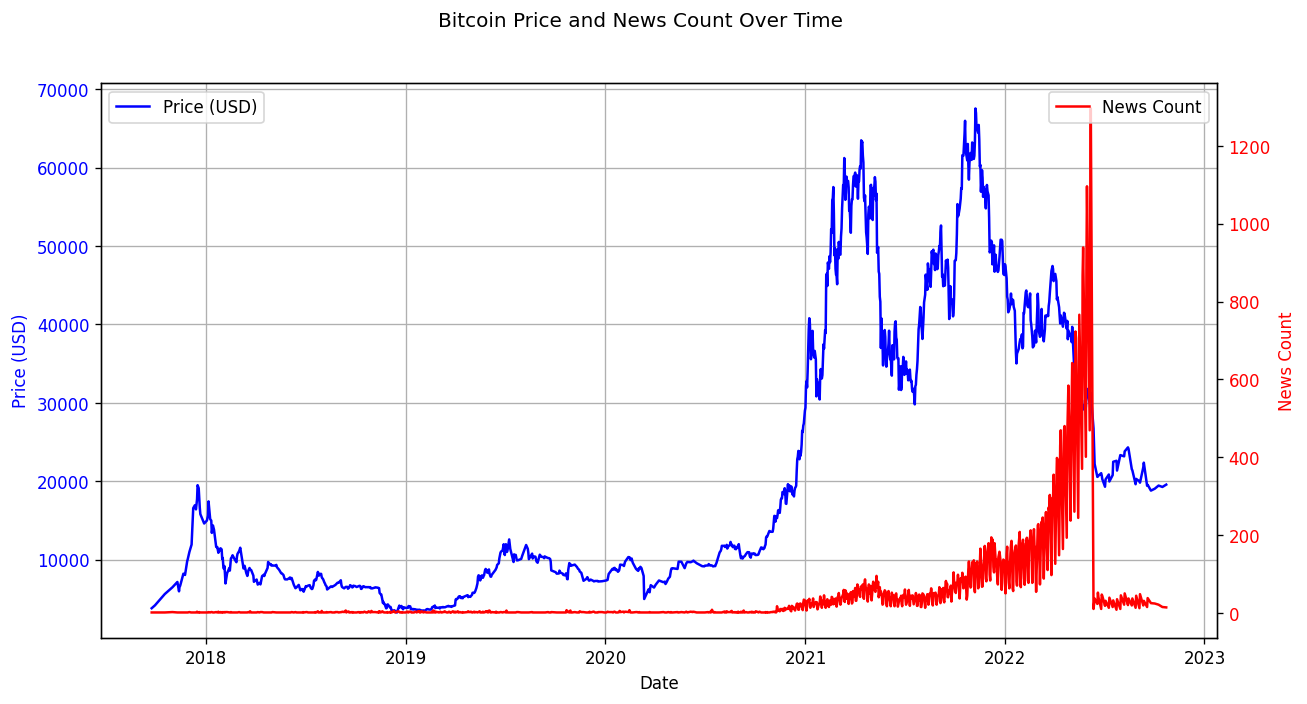

In [155]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the Bitcoin price on the first y-axis
ax1.plot(merged_inner['date_normal'], merged_inner['close'], 'b-', label='Price (USD)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a twin axis for the news count
ax2 = ax1.twinx()
ax2.plot(merged_inner['date_normal'], merged_inner['cnt'], 'r-', label='News Count')
ax2.set_ylabel('News Count', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title, grid, and legend
fig.suptitle('Bitcoin Price and News Count Over Time')
ax1.grid(True)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()